In [2]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Logistic Regression

## Model

In [3]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

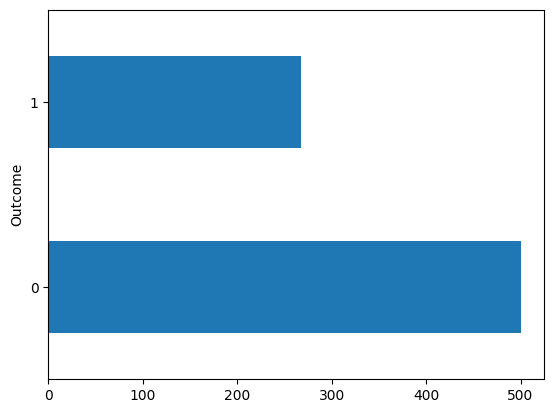

In [6]:
df["Outcome"].value_counts().plot.barh();

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

## Statsmodels

In [9]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Sat, 03 Aug 2024   Pseudo R-squ.:                 0.05922
Time:                        14:25:57   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

## Scikit-Learn

In [10]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [11]:
loj_model.intercept_

array([-5.84073324])

In [12]:
loj_model.coef_

array([[ 1.16937119e-01,  2.82506791e-02, -1.69647463e-02,
         7.64900753e-04, -6.30568264e-04,  5.91967766e-02,
         6.68475894e-01,  7.08845329e-03]])

## Predict & Model Tuning

In [13]:
y_pred = loj_model.predict(X)

In [14]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [15]:
accuracy_score(y, y_pred)

0.7747395833333334

In [16]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [17]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [18]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.35208919, 0.64791081],
       [0.91613598, 0.08386402],
       [0.22544273, 0.77455727],
       [0.92033572, 0.07966428],
       [0.16985872, 0.83014128],
       [0.79768782, 0.20231218],
       [0.8787278 , 0.1212722 ],
       [0.2764273 , 0.7235727 ],
       [0.32085978, 0.67914022],
       [0.9216265 , 0.0783735 ]])

In [19]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [20]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [21]:
y_probs[0:10]

array([0.64791081, 0.08386402, 0.77455727, 0.07966428, 0.83014128,
       0.20231218, 0.1212722 , 0.7235727 , 0.67914022, 0.0783735 ])

In [22]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [23]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [24]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [25]:
accuracy_score(y, y_pred)

0.7747395833333334

In [26]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [27]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.64791081, 0.08386402, 0.77455727, 0.07966428, 0.83014128])

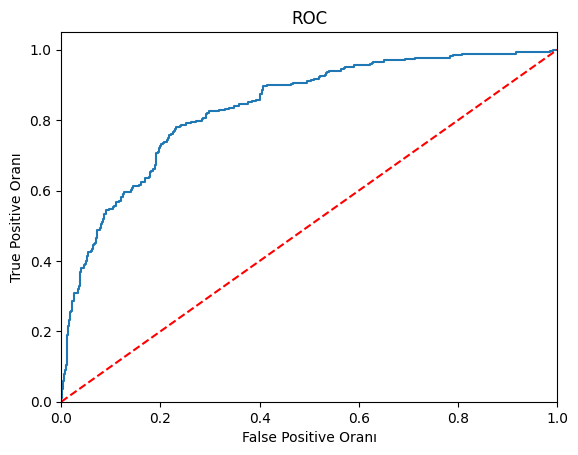

In [28]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [30]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [31]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7532467532467533

In [32]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7748188405797102

# Gaussian Naive Bayes

When dealing with many categorical variables with distinct characteristics, we often use Gaussian Naive Bayes. This algorithm assumes features follow a normal distribution, making it efficient and effective for high-dimensional datasets.



In [33]:
df = diabetes.copy()
df = df.dropna()
y =df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [34]:
from sklearn.naive_bayes import GaussianNB

In [37]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [38]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [39]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [40]:
# test error calculation
y_pred = nb_model.predict(X_test)

In [41]:
# accuracy score calculation
accuracy_score(y_test, y_pred)

0.7445887445887446

In [45]:
# approved test error calculation
cross_val_score(nb_model, X_test, y_test, cv= 10).mean()

0.775

Logistic Regression = 0.774

Gaussian Naive Bayes = 0.775

## K-Nearest Neighbors (KNN)

Makes predictions based on the similarity of observations. It's like the saying, "Tell me who your friends are, and I'll tell you who you are." The algorithm classifies a data point by looking at its 'neighbors' and assigning the most common label among them.

## Model & Prediction

In [46]:
df = diabetes.copy()
df = df.dropna()
y =df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [47]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [48]:
y_pred = knn_model.predict(X_test)

In [49]:
# primitive score
accuracy_score(y_test, y_pred)

0.6883116883116883

In [50]:
# verified value
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



## Model Tuning

In [52]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [55]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [57]:
print("The Best Score :" + str(knn_cv.best_score_)) # not important
print("The Best Params :" + str(knn_cv.best_params_))

The Best Score :0.748637316561845
The Best Params :{'n_neighbors': 11}


In [58]:
knn = KNeighborsClassifier(11)
knn_tuned = knn_cv.fit(X_train, y_train)

In [59]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [61]:
y_pred = knn_tuned.predict(X_test)

In [62]:
accuracy_score(y_test, y_pred)

0.7316017316017316

# Support Vector Machines (SVM) 

Aim to find the optimal hyperplane that separates two classes. The goal is to identify a margin that contains as few observations as possible, ensuring clear separation between the classes. Initially developed for classification problems and were later adapted for regression tasks. 

## Linear SVM
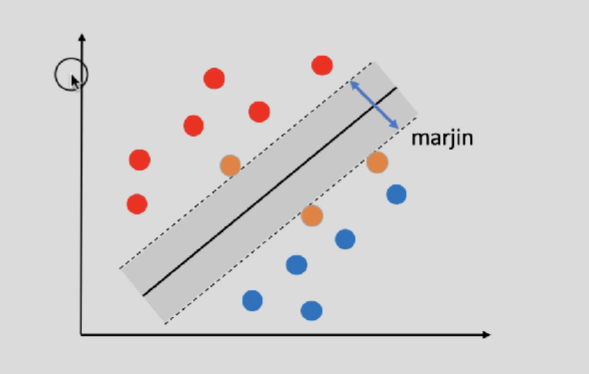


## Nonlinear SVM
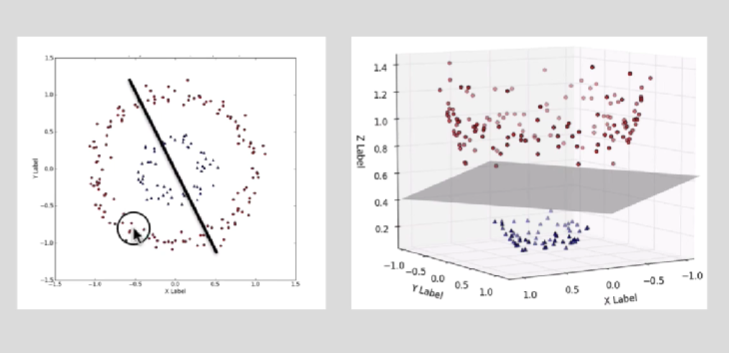

# Linear

## Model & Prediction

In [63]:
df = diabetes.copy()
df = df.dropna()
y =df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [64]:
svm_model = SVC(kernel= "linear").fit(X_train, y_train)

In [65]:
svm_model

SVC(kernel='linear')

In [66]:
y_pred = svm_model.predict(X_test)

In [67]:
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [70]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel="linear")

svc_cv_model = GridSearchCV(svc,svc_params,
                            cv=10,
                            n_jobs=-1,
                             verbose=2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [72]:
print("The Best Params :" + str(svc_cv_model.best_params_))

The Best Params :{'C': 5}


In [75]:
svc_tuned= SVC(kernel = "linear", C=5).fit(X_train, y_train)

In [77]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# RBF SVC (nonlinear)

## Model & Prediction

In [78]:
df = diabetes.copy()
df = df.dropna()
y =df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [80]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [86]:
svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [87]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
              "gamma": [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]}

In [89]:
svc = SVC()
svc_cv_model = GridSearchCV(svc,svc_params,
                            cv=10,
                            n_jobs=-1,
                             verbose=2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [91]:
print("The Best Params :" + str(svc_cv_model.best_params_))

The Best Params :{'C': 10, 'gamma': 0.0001}


In [93]:
svc_tuned = SVC(C =10 , gamma=0.0001).fit(X_train, y_train)

In [94]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

# Artificial Neural Networks (ANNs)

In [95]:
df = diabetes.copy()
df = df.dropna()
y =df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
scaler = StandardScaler()

In [98]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
X_train_scaled[0:5]

array([[-0.8362943 , -0.80005088, -0.53576428, -0.15714558, -0.18973183,
        -1.06015343, -0.61421636, -0.94861028],
       [ 0.39072767, -0.49054341,  0.12804365,  0.55361931,  2.13020339,
         0.64646721, -0.90973787, -0.43466673],
       [-1.14304979,  0.43797901, -0.09322566,  1.39361417,  1.47853619,
         1.35537117, -0.30699103, -0.77729576],
       [ 0.08397217,  0.31417602, -0.09322566,  0.03669939,  0.74866893,
         0.14760887, -0.90681191, -0.43466673],
       [-0.8362943 , -0.5524449 , -2.19528409,  1.13515422,  0.02749057,
         1.48664968, -0.83951493, -0.00638043]])

In [100]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [101]:
from sklearn.neural_network import MLPClassifier

In [104]:
mlpc= MLPClassifier().fit(X_train_scaled, y_train)

In [106]:
# coefficients
mlpc.coefs_

[array([[-1.81924660e-01,  1.15429337e-01, -1.05351159e-01,
         -8.02254126e-02, -2.46080426e-01, -2.39019332e-01,
          2.40637695e-01,  1.32388342e-01, -8.78441315e-02,
         -1.63971207e-01, -4.15698258e-04, -2.70716198e-01,
         -3.47763342e-01,  6.58098347e-02, -4.70654981e-02,
         -2.92878375e-01,  8.27247620e-02, -2.57425343e-01,
          1.60299084e-01,  1.11668165e-01, -6.38175741e-02,
          1.34046646e-01, -2.73979461e-02, -4.83349158e-03,
          8.51440612e-03, -3.40264517e-01, -6.54884142e-02,
          6.82734736e-02,  1.29869256e-01, -2.45409424e-01,
         -9.16754792e-02, -1.94748043e-01, -1.96683203e-01,
          1.04510676e-01,  1.50748034e-01,  1.69061212e-01,
          1.46081213e-01,  1.32227421e-02, -3.56507731e-01,
          1.96927446e-01,  1.54912865e-01, -1.72274538e-01,
         -4.17992561e-01,  2.01242341e-01, -1.00664983e-01,
         -2.58048394e-01, -1.52354865e-01, -3.43733541e-01,
         -3.30459667e-01,  2.55050089e-0

In [107]:
dir(mlpc)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_backprop',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_solver',
 '_compute_loss_grad',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_forward_pass_fast',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_label_binarizer',
 '_loss_grad_lbfgs',
 '_more_tags',
 '_no

In [110]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [112]:
?mlpc

Type:        MLPClassifier
String form: MLPClassifier()
File:        c:\users\zeyne\appdata\local\programs\python\python312\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : 

In [119]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001, 0.00001],
               "hidden_layer_sizes": [(10,10,10),
                                      (100,100,100),
                                      (100,100),
                                      (3,5),
                                      (5,3)],
                "solver": ["lbfgs","adam","sgd"],
                "activation": ["relu","logistic"]
}

In [120]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params,
                             cv=10,
                             n_jobs=-1,
                             verbose=2
                             )
mlpc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [121]:
print("The Best Params :" + str(mlpc_cv_model.best_params_))

The Best Params :{'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'adam'}


In [123]:
mlpc_tuned = MLPClassifier(activation="logistic",
                           alpha=0.1,
                           hidden_layer_sizes=(100, 100, 100),
                           solver="adam"
                           )

In [125]:
mlpc_tuned.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.1,
              hidden_layer_sizes=(100, 100, 100))

In [ ]:
y_pred = mlpc_tuned.predict(X_test,)